In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib notebook

/Users/lucient/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Problem 1.a

In [2]:
df = pd.read_csv('data/Auto.csv', na_values=['?'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


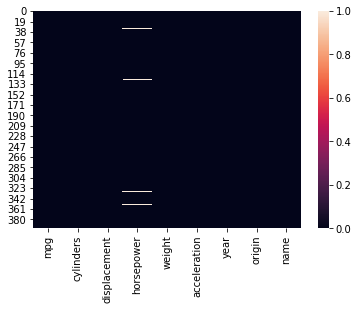

In [3]:
# Visualize missing data. 
sns.heatmap(df.isnull())

## Problem 1.b

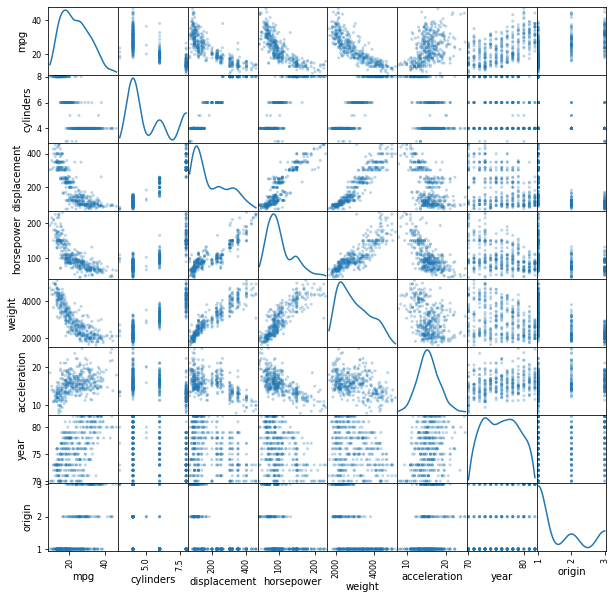

In [4]:
df_reg = df[['mpg', 'cylinders', 'displacement', 
             'horsepower', 'weight', 'acceleration', 
             'year', 'origin']].dropna().astype(float)
axs = pd.plotting.scatter_matrix(df_reg, alpha=0.3, figsize=(10, 10), diagonal='kde')

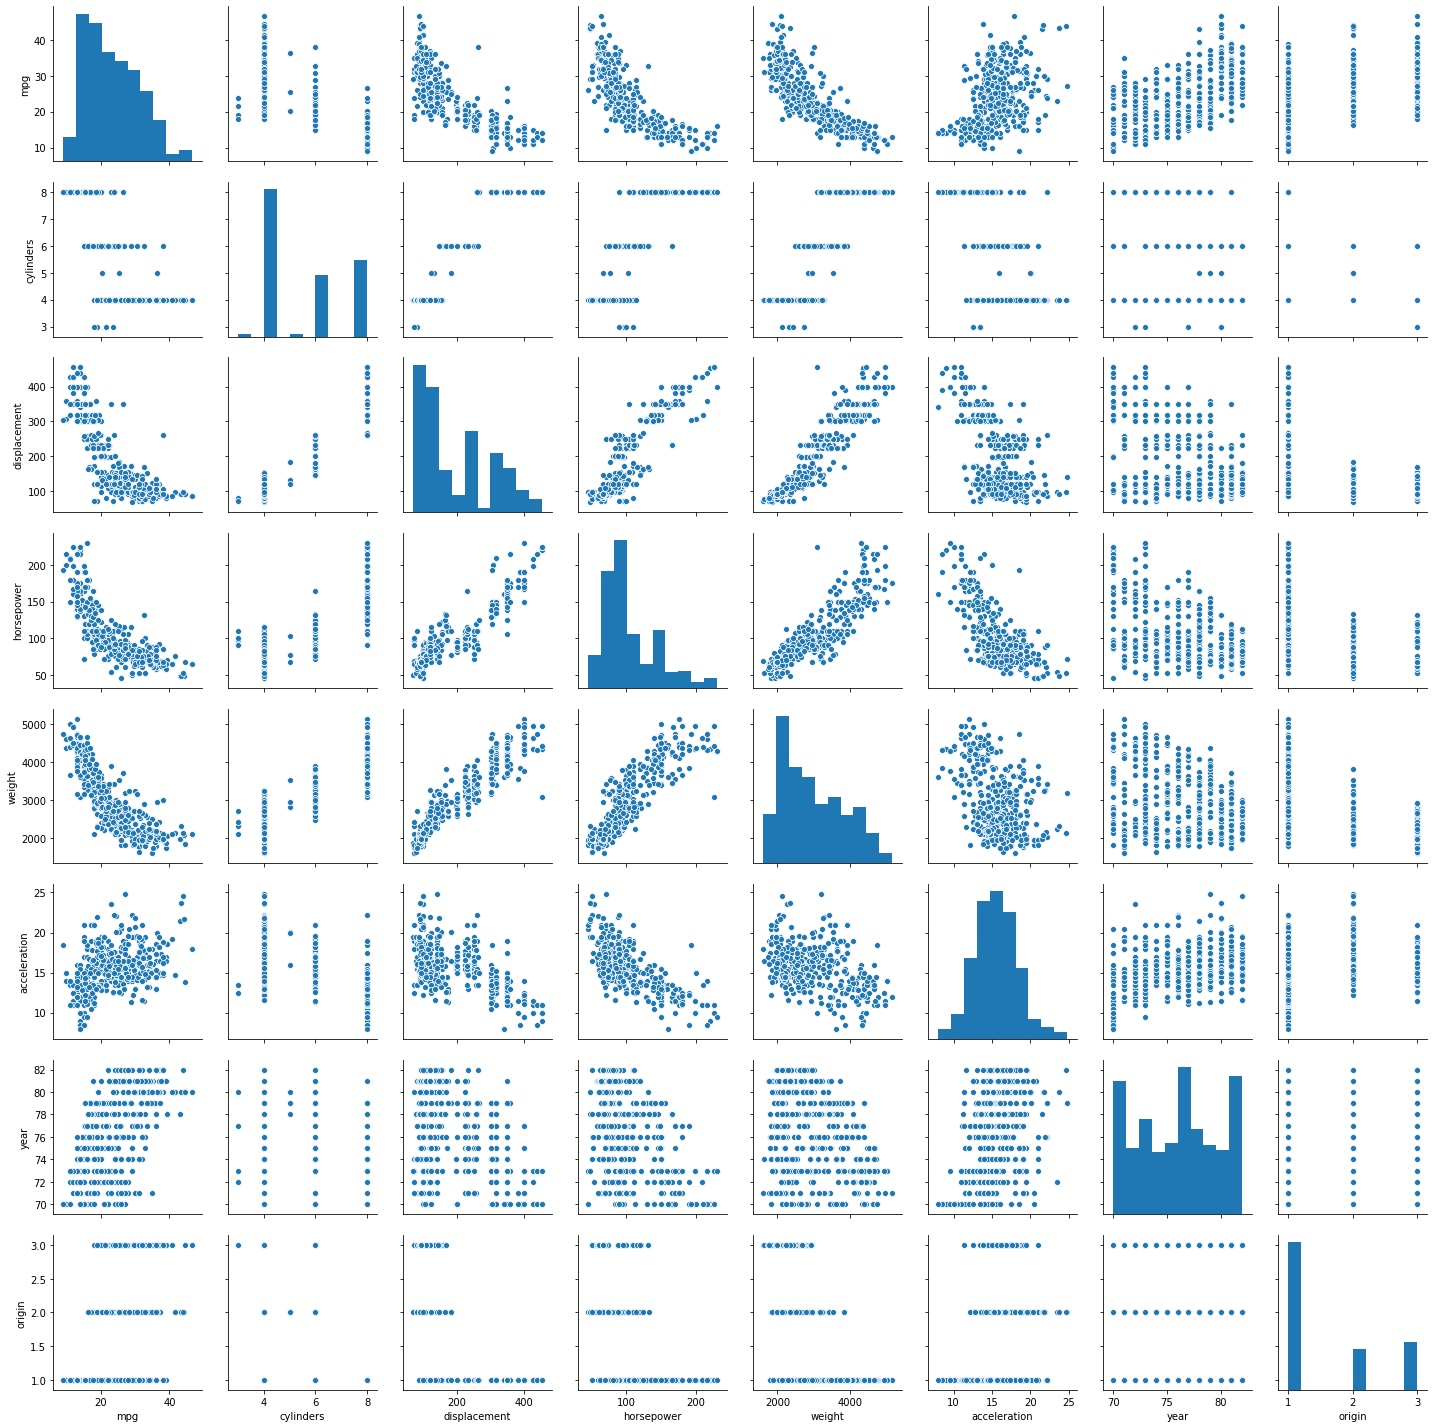

In [5]:
# Seaborn generates better-looking graphs for this. 
sns.pairplot(df_reg)

## Problem 1.c

In [6]:
df_reg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Problem 1.d

In [7]:
X = sm.add_constant(df_reg[['cylinders', 'displacement', 
             'horsepower', 'weight', 'acceleration', 
             'year', 'origin']])
y = df_reg['mpg']
reg = sm.OLS(endog=y, exog=X)
result = reg.fit()

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        01:34:03   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

- The coefficients of `constant`, `displacement`, `weight`, `year`, `origin` are statistically significant at the 1% level. 
- The coeeficients of `cylinders`, `horsepower`, `acceleration` are not statistically significant at the 10% level. 
- If the vehicle year differs by one year, the miles per gallon will, ceteris paribus, differ by 0.7508 miles on average. 

## Problem 1.e

-  `displacement`, `horsepower`, `weight` seem to have nonlinear relationships with `mpg`.

In [9]:
# Introduce quadratic term into the model. 
df_reg['displacement_sqr'] = np.square(df_reg['displacement'])
df_reg['horsepower_sqr'] = np.square(df_reg['horsepower'])
df_reg['weight_sqr'] = np.square(df_reg['weight'])
df_reg['acceleration_sqr'] = np.square(df_reg['acceleration'])

y_quad = df_reg['mpg']
X_quad = sm.add_constant(
    df_reg[['cylinders', 'displacement', 'displacement_sqr', 
            'horsepower', 'horsepower_sqr', 'weight', 'weight_sqr', 
            'acceleration', 'acceleration_sqr', 'year', 'origin']])

reg_quad = sm.OLS(endog=y_quad, exog=X_quad)
result_quad = reg_quad.fit()

In [10]:
print(result_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        01:34:03   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.1084      6.696  

- Include squared terms on `displacement`, `horsepower`, `weight`, as well as `acceleration`. 
- Adjusted R-squard = 0.866 is slightlyl better than the adjusted R-sqared = 0.818 from part(d).
- The statistical significance of `displacement` becomes not statistically significant at the 10% level. `displacement_sqr` is not statistically significant at the 10% level either. 
- `cyliners` is not statistically significant either. 

## Problem 1.f

In [11]:
X_pred = np.array([1, 6, 200, 200 ** 2, 100, 100 ** 2, 3100, 3100 ** 2, 15.1, 15.1 ** 2, 99, 1])
print('Prediction \n'+'=' * 30, '\nmpg_hat    ', result_quad.predict(exog=X_pred)[0])

Prediction 
mpg_hat     38.732111098017086
